# Логистическая регрессия

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
df_train = pd.read_csv('train.csv', encoding='utf8')

In [26]:
df_train.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [27]:
df_train.dropna()
print(df_train.shape)
print(list(df_train.columns))

(24712, 22)
['_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target']


Оставляем только самое важно.

In [28]:
df_train.drop(df_train.columns[[0, 1, 4, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]], axis=1, inplace=True)

In [29]:
df_train.head()

,job,marital,default,housing,loan,poutcome,target
0,technician,married,unknown,no,no,nonexistent,0
1,services,single,no,no,no,nonexistent,0
2,blue-collar,married,no,yes,no,nonexistent,0
3,blue-collar,married,no,yes,yes,nonexistent,0
4,services,single,no,yes,no,nonexistent,0


In [30]:
data2 = pd.get_dummies(df_train, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [31]:
data2.columns

Index(['target', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [32]:
data2.head()

,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [33]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)

In [34]:
data2.head(15)

,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
7,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


In [35]:
print(data2.iloc[:,1:])

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0               0                0                 0              0   
1               0                0                 0              0   
2               0                1                 0              0   
3               0                1                 0              0   
4               0                0                 0              0   
5               0                0                 0              0   
6               1                0                 0              0   
7               0                0                 0              0   
8               0                0                 0              0   
9               0                1                 0              0   
10              1                0                 0              0   
11              0                1                 0              0   
12              0                0                 0              0   
13    

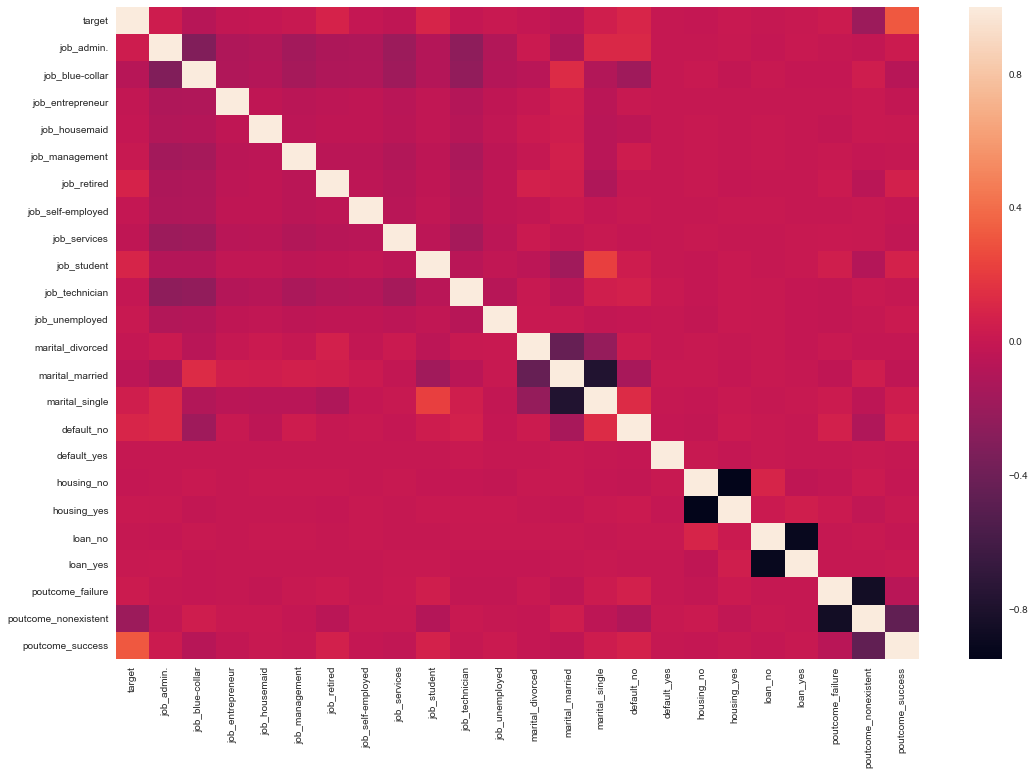

In [36]:
sns.heatmap(data2.corr())
plt.show()

In [37]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [38]:
X_train.shape


(18534, 23)

In [39]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[5413,   61],
       [ 574,  130]])

In [41]:
print(format(classifier.score(X_test, y_test)))


0.8972159274846229


Готовим данные для проверки

In [47]:
df_test = pd.read_csv('test.csv', encoding='utf8')

In [48]:
df_test.head()

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [49]:
df_test.shape

(16476, 21)

In [50]:
df_test.drop(df_test.columns[[1, 4, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20]], axis=1, inplace=True)

In [51]:
df_test.head()

,_id,job,marital,default,housing,loan,poutcome
0,66810d8e6bf2b41c880a7bc6c8a1e295,technician,married,no,no,yes,failure
1,ccac3879652b08cb8b44c1920fd93afa,unknown,married,unknown,yes,no,nonexistent
2,fcccab4d7a76f70647f015f2c84c2af8,blue-collar,married,no,no,no,failure
3,ed8399278c30678dab739045fa12b440,admin.,married,no,no,no,nonexistent
4,1d4d62ac5cabcb48bac7112813f290cb,housemaid,married,no,yes,no,nonexistent


In [52]:
data4 = pd.get_dummies(df_test, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [53]:
data4.drop(data4.columns[[0,12, 16, 18, 21, 24]], axis=1, inplace=True)

In [54]:
data4.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0


In [55]:
test_preds = classifier.predict(X=data4)

In [56]:
submission = pd.DataFrame({"_id":df_test["_id"],
                           "target":test_preds})

Выгружаем

In [61]:
submission.to_csv("result.csv", 
                  index=False)  

#  Дерево принятия решений

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import pydot
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from ipywidgets import interact, IntSlider, FloatSlider

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from ipywidgets import interact, IntSlider
import subprocess

In [63]:
try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve

try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold

In [65]:
model = DecisionTreeClassifier(random_state=123)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=132)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')

Text(0,0.5,'ROC AUC')

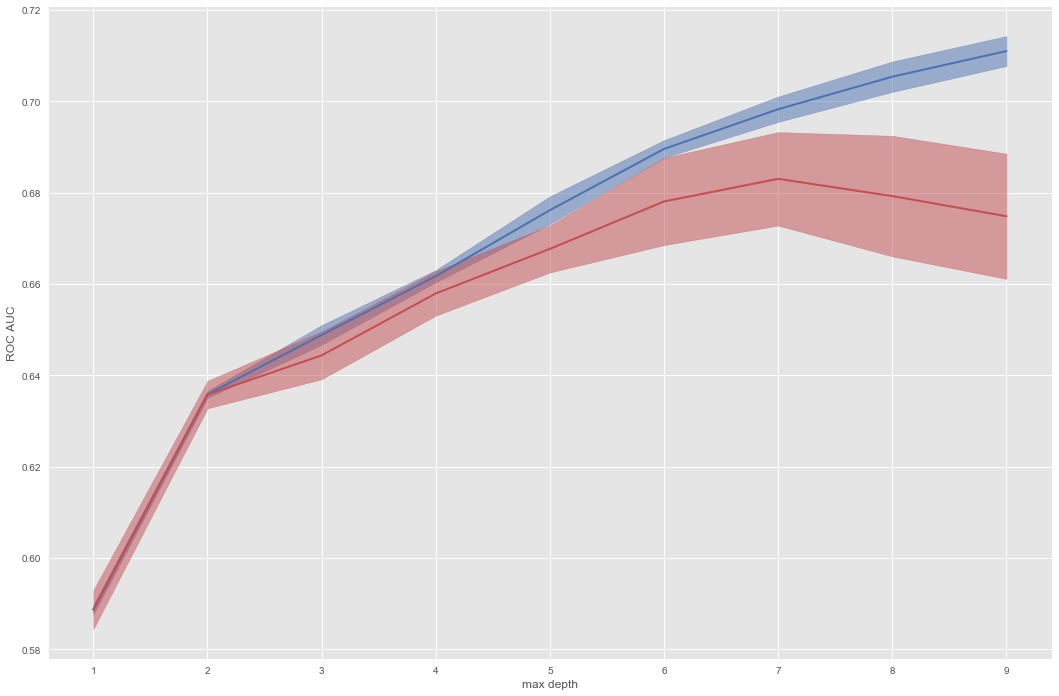

In [66]:
train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

In [67]:
from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold


RND_SEED = 123

In [68]:


param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(2, 8),
    'min_samples_leaf': randint(5, 10),
    'class_weight': [None, 'balanced']}

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

model = DecisionTreeClassifier(random_state=123)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=200, n_jobs=-1,
                                   cv=cv, scoring='roc_auc', random_state=123)
random_search.fit(X, y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
          error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x117d77d68>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1168f2f98>, 'class_weight': [None, 'balanced']},
          pre_dispatch='2*n_jobs', random_state=123, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=0)

In [69]:
random_search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 9}

In [70]:
random_search.best_score_

0.686742713930842

# KNN

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [81]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

In [82]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [83]:
y_hat = model.predict(X_test)

In [84]:
y_hat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
y_hat_proba = model.predict_proba(X_test, )

In [86]:
y_hat_proba[:10]

array([[1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2]])

In [87]:
from sklearn.metrics import roc_auc_score

In [88]:
roc_auc_score(y_test, y_hat_proba[:, 1])

0.61463286105437

In [89]:
scores_test = []
scores_train = []

for k in range(1, 15):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    model.fit(X_train, y_train, )
    
    y_hat_test = model.predict_proba(X_test)
    scores_test.append(roc_auc_score(y_test, y_hat_test[:, 1]))
    
    y_hat_train = model.predict_proba(X_train)
    scores_train.append(roc_auc_score(y_train, y_hat_train[:, 1]))
    
    

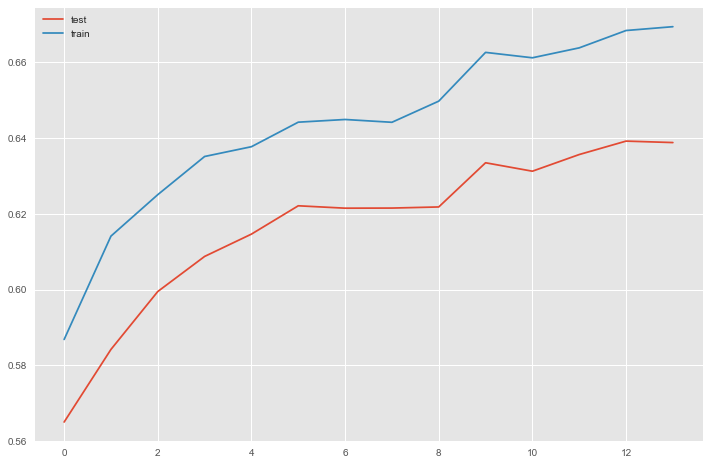

In [90]:
plt.plot(scores_test, label='test') # Тестовая выборка
plt.plot(scores_train, label='train') # Обучающая
plt.legend()